Sales Analysis Project


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Better plot styles
sns.set(style="whitegrid")
%matplotlib inline


In [4]:
# Load the dataset
import pandas as pd
df = pd.read_csv('sales.csv', encoding='latin1')
  # replace with your file name
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Check data info
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Performnig EDA 


In [8]:
# Summary statistics
df.describe()

# Unique values in key columns
print("Unique Products:", df['Product Name'].nunique())
print("Unique Categories:", df['Category'].nunique())
print("Unique Regions:", df['Region'].nunique())


Unique Products: 1850
Unique Categories: 3
Unique Regions: 4


Total Sales & profit overview

In [9]:
# Total Sales and Profit
print("Total Sales: ₹", df['Sales'].sum())
print("Total Profit: ₹", df['Profit'].sum())

# Sales by Region
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)


Total Sales: ₹ 2297200.8603000003
Total Profit: ₹ 286397.0217


Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # change column name if needed
df['Month'] = df['Order Date'].dt.to_period('M')


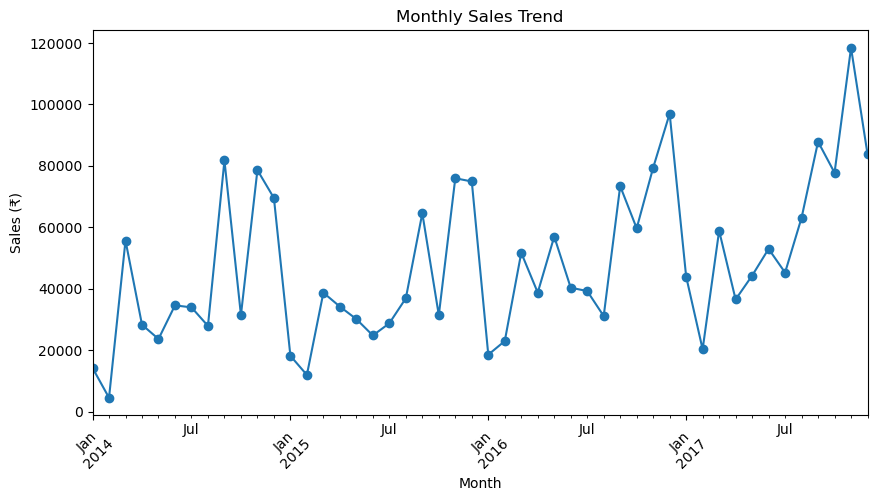

In [13]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('Month')['Sales'].sum()

# Plot it
monthly_sales.plot(kind='line', figsize=(10,5), title='Monthly Sales Trend', marker='o')
plt.ylabel("Sales (₹)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


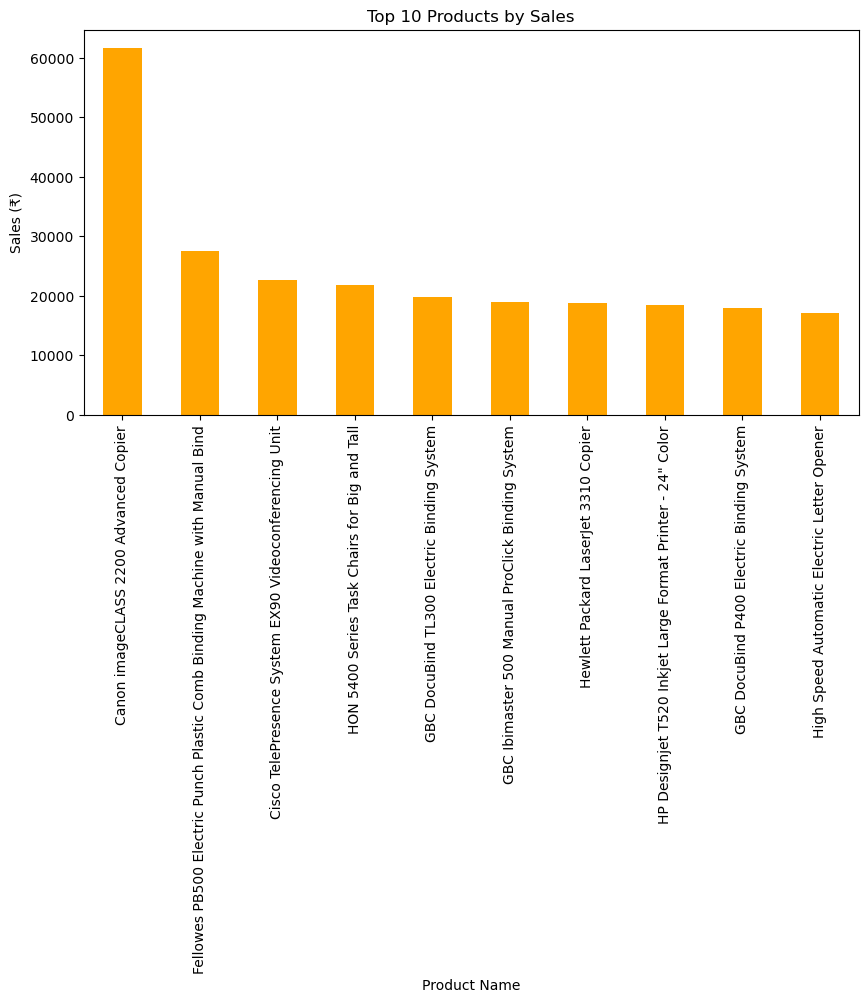

In [15]:
#Top Products by Revenue

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Bar Plot
top_products.plot(kind='bar', figsize=(10,5), color='orange', title='Top 10 Products by Sales')
plt.ylabel("Sales (₹)")
plt.show()


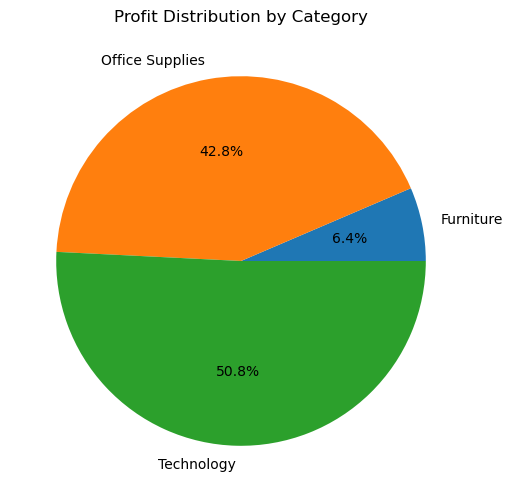

In [16]:
#Category Wise Profitability
category_profit = df.groupby('Category')['Profit'].sum()

# Pie Chart
category_profit.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Profit Distribution by Category')
plt.ylabel("")
plt.show()


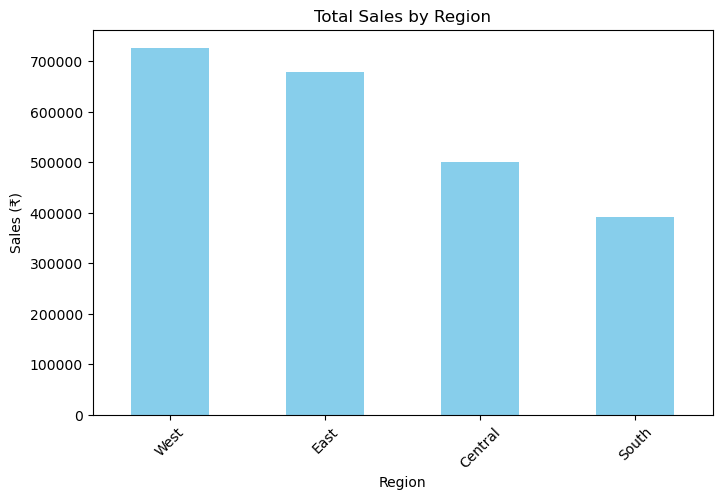

In [18]:
#Total sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Bar chart
region_sales.plot(kind='bar', figsize=(8,5), color='skyblue', title='Total Sales by Region')
plt.ylabel("Sales (₹)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


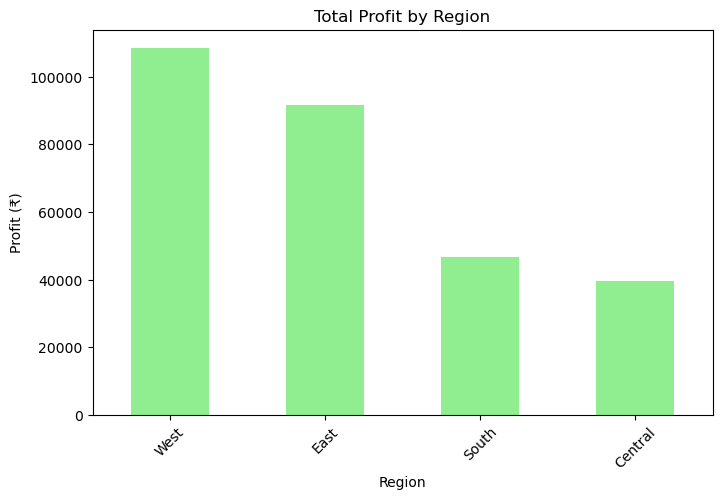

In [19]:
#Total profit by region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Bar chart
region_profit.plot(kind='bar', figsize=(8,5), color='lightgreen', title='Total Profit by Region')
plt.ylabel("Profit (₹)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


Combined View (Sales vs Profit per Region)

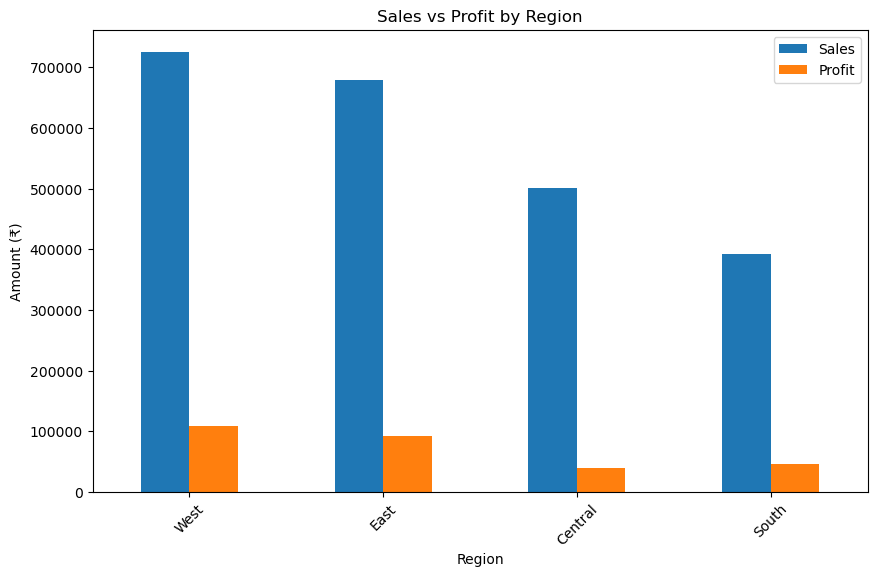

In [20]:
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

region_summary.plot(kind='bar', figsize=(10,6), title='Sales vs Profit by Region')
plt.ylabel("Amount (₹)")
plt.xticks(rotation=45)
plt.show()


 Scatter Plot: Discount vs Profit

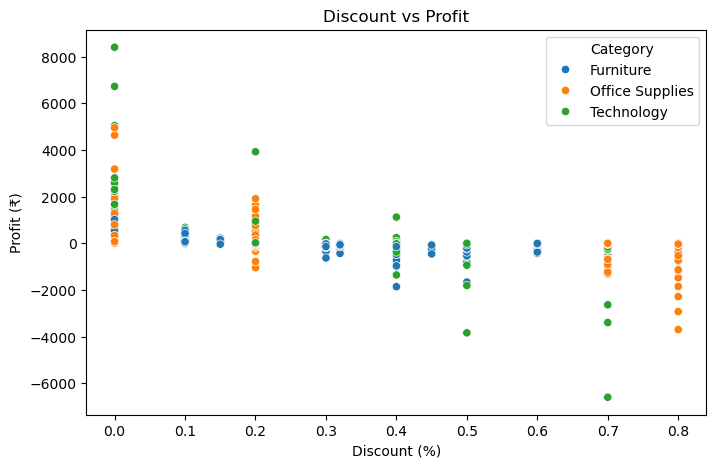

In [22]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Profit (₹)')
plt.show()


In [23]:
correlation = df[['Discount', 'Profit']].corr()
print("Correlation between Discount and Profit:\n", correlation)


Correlation between Discount and Profit:
           Discount    Profit
Discount  1.000000 -0.219487
Profit   -0.219487  1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_11436\749526955.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_profit_per_discount = df.groupby(discount_bins)['Profit'].mean()


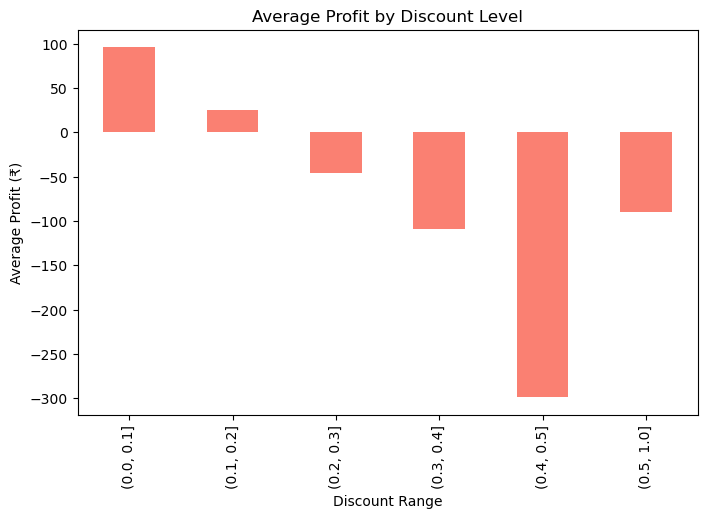

In [24]:
#Average Profit at Different Discount Levels
discount_bins = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0])
avg_profit_per_discount = df.groupby(discount_bins)['Profit'].mean()

# Bar plot
avg_profit_per_discount.plot(kind='bar', color='salmon', title='Average Profit by Discount Level', figsize=(8,5))
plt.ylabel("Average Profit (₹)")
plt.xlabel("Discount Range")
plt.show()


In [25]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_discount = df['Discount'].mean()

print(f"🧾 Total Sales: ₹{total_sales:,.2f}")
print(f"💰 Total Profit: ₹{total_profit:,.2f}")
print(f"🔻 Average Discount Given: {avg_discount*100:.2f}%")


🧾 Total Sales: ₹2,297,200.86
💰 Total Profit: ₹286,397.02
🔻 Average Discount Given: 15.62%


In [27]:
# Create summary tables
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum()
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum()
product_summary = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)

# Export to Excel
with pd.ExcelWriter("Sales_Performance_Summary.xlsx") as writer:
    df.to_excel(writer, sheet_name='Raw_Data', index=False)
    region_summary.to_excel(writer, sheet_name='Region_Summary')
    category_summary.to_excel(writer, sheet_name='Category_Summary')
    product_summary.to_excel(writer, sheet_name='Top_Products')


In [34]:
# Save key plots as images
plt.figure(figsize=(8,5))
region_summary.plot(kind='bar', title='Sales vs Profit by Region')
plt.tight_layout()
plt.savefig('region_summary_plot.png')
plt.close()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.savefig('discount_vs_profit.png')
plt.close()


<Figure size 800x500 with 0 Axes>

In [35]:
with pd.ExcelWriter("Sales_Performance_Summary.xlsx") as writer:
    df.to_excel(writer, sheet_name='Raw_Data', index=False)
    region_summary.to_excel(writer, sheet_name='Region_Summary')
    category_summary.to_excel(writer, sheet_name='Category_Summary')
    product_summary.to_excel(writer, sheet_name='Top_Products')


In [36]:
# Save region summary plot
plt.figure(figsize=(8,5))
region_summary.plot(kind='bar', title='Sales vs Profit by Region')
plt.tight_layout()
plt.savefig('region_summary_plot.png')
plt.close()

# Save discount vs profit scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.savefig('discount_vs_profit.png')
plt.close()


<Figure size 800x500 with 0 Axes>

In [38]:
from fpdf import FPDF
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have these values from your analysis
total_sales = df['Sales'].sum()  # Total Sales (in ₹)
total_profit = df['Profit'].sum()  # Total Profit (in ₹)
avg_discount = df['Discount'].mean()  # Average Discount (%)

# Save region summary plot
plt.figure(figsize=(8, 5))
region_summary.plot(kind='bar', title='Sales vs Profit by Region')
plt.tight_layout()
plt.savefig('region_summary_plot.png')
plt.close()

# Save discount vs profit scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.savefig('discount_vs_profit.png')
plt.close()

# Create PDF object
pdf = FPDF()
pdf.add_page()

# Set font for title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Sales Performance Summary", ln=1, align='C')
pdf.ln(10)

# Set font for the content
pdf.set_font("Arial", size=12)

# Title and metrics (change ₹ to INR)
pdf.cell(200, 10, txt=f"Total Sales: INR {total_sales:,.2f}", ln=2)
pdf.cell(200, 10, txt=f"Total Profit: INR {total_profit:,.2f}", ln=3)
pdf.cell(200, 10, txt=f"Average Discount: {avg_discount*100:.2f}%", ln=4)


# Add region summary plot image
pdf.image('region_summary_plot.png', x=10, y=None, w=180)
pdf.ln(10)

# Add discount vs profit plot image
pdf.image('discount_vs_profit.png', x=10, y=None, w=180)

# Output PDF
pdf.output("Sales_Performance_Report.pdf")

print("PDF report generated: Sales_Performance_Report.pdf")


PDF report generated: Sales_Performance_Report.pdf


<Figure size 800x500 with 0 Axes>